In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [2]:
df=pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df.head()

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

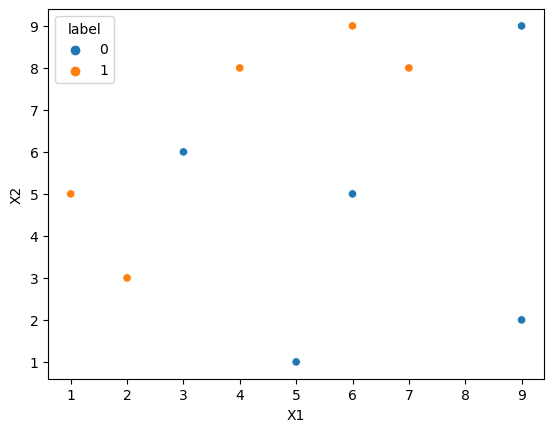

In [6]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [8]:
#Assigning weight to the label
df['weight']=1/df.shape[0]

In [9]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt1=DecisionTreeClassifier(max_depth=1)

In [12]:
X=df.iloc[:,0:2]
y=df.iloc[:,2]

In [13]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [14]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [15]:
# Train the model

dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [16]:
from  sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

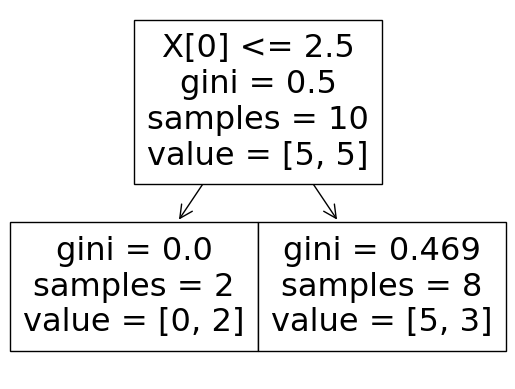

In [18]:
plot_tree(dt1)

In [19]:
plot_decison_regions(X,y,clf=dt1,legend=2)

NameError: name 'plot_decison_regions' is not defined

In [20]:
df['y_pred']=dt1.predict(X)

In [21]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [59]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error+0.00000001))

In [24]:
#Step 3 - calculate model weight

alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [25]:
#Step 4 - Update the weight

def update_row_weights(row,alpha=alpha1):
    if row['label']==row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [26]:
df['update_weights']=df.apply(update_row_weights,axis=1)

In [27]:
df.head()

,X1,X2,label,weight,y_pred,update_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
3,4,8,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065465


In [28]:
df['update_weights'].sum()

0.9165151389911682

In [29]:
df['normalized_weights']=df['update_weights']/df['update_weights'].sum()

In [30]:
df

,X1,X2,label,weight,y_pred,update_weights,normalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,6,5,0,0.1,0,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


In [31]:
df['normalized_weights'].sum()

0.9999999999999999

In [32]:
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [33]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [35]:
df[['X1','X2','label','weight','y_pred','update_weights','normalized_weights','cumsum_lower','cumsum_upper',]]

,X1,X2,label,weight,y_pred,update_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065465,0.071429,0.000000,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.071429,0.142857
2,3,6,0,0.1,0,0.065465,0.071429,0.142857,0.214286
3,4,8,1,0.1,0,0.152753,0.166667,0.214286,0.380952
4,5,1,0,0.1,0,0.065465,0.071429,0.380952,0.452381
5,6,9,1,0.1,0,0.152753,0.166667,0.452381,0.619048
6,6,5,0,0.1,0,0.065465,0.071429,0.619048,0.690476
7,7,8,1,0.1,0,0.152753,0.166667,0.690476,0.857143
8,9,9,0,0.1,0,0.065465,0.071429,0.857143,0.928571
9,9,2,0,0.1,0,0.065465,0.071429,0.928571,1.000000


In [37]:
df.drop(['normalized_weights'],axis=1,inplace=True)

In [38]:
df

,X1,X2,label,weight,y_pred,update_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065465,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.142857,0.071429
2,3,6,0,0.1,0,0.065465,0.214286,0.142857
3,4,8,1,0.1,0,0.152753,0.380952,0.214286
4,5,1,0,0.1,0,0.065465,0.452381,0.380952
5,6,9,1,0.1,0,0.152753,0.619048,0.452381
6,6,5,0,0.1,0,0.065465,0.690476,0.619048
7,7,8,1,0.1,0,0.152753,0.857143,0.690476
8,9,9,0,0.1,0,0.065465,0.928571,0.857143
9,9,2,0,0.1,0,0.065465,1.000000,0.928571


In [ ]:
#Create a new dataset with the new df

In [45]:
def create_new_dataset(df):
    indices=[]
    
    for i in range (df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a and a>row['cumsum_lower']:
                indices.append(index)
    return indices

In [47]:
index_values=create_new_dataset(df)
index_values

[3, 5, 3, 8, 6, 5, 1, 4, 2, 5]

In [48]:
# new dataset for the model

second_df=df.iloc[index_values,[0,1,2,3]]



In [49]:
second_df

,X1,X2,label,weight
3,4,8,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1


In [50]:
 dt2=DecisionTreeClassifier(max_depth=1)

In [52]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [53]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]')]

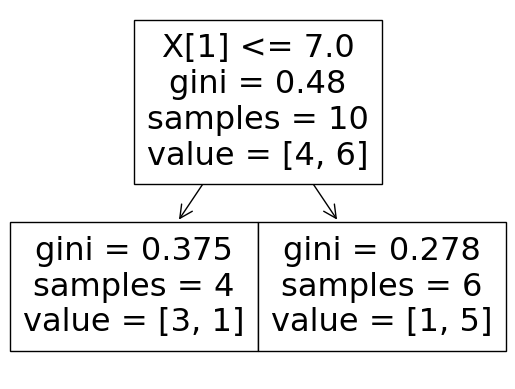

In [55]:
plot_tree(dt2)

In [ ]:
plot_decison_regions(X,y,clf=dt2,legend=2)

In [56]:
second_df['y_pred']=dt2.predict(X)

In [57]:
second_df

,X1,X2,label,weight,y_pred
3,4,8,1,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,1
6,6,5,0,0.1,0
5,6,9,1,0.1,1
1,2,3,1,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,1


In [58]:
alpha2=calculate_model_weight(0.2)
alpha2

0.6931471805599453

In [61]:
second_df['update_weights']=df.apply(update_row_weights,axis=1)

In [60]:
def update_row_weights(row,alpha=alpha2):
    if row['label']==row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [62]:
second_df

,X1,X2,label,weight,y_pred,update_weights
3,4,8,1,0.1,1,0.20
5,6,9,1,0.1,1,0.20
3,4,8,1,0.1,1,0.20
8,9,9,0,0.1,1,0.05
6,6,5,0,0.1,0,0.05
5,6,9,1,0.1,1,0.20
1,2,3,1,0.1,0,0.05
4,5,1,0,0.1,0,0.05
2,3,6,0,0.1,0,0.05
5,6,9,1,0.1,1,0.20


In [63]:
second_df['normalized_weights']=second_df['update_weights']/second_df['update_weights'].sum()

In [64]:
second_df

,X1,X2,label,weight,y_pred,update_weights,normalized_weights
3,4,8,1,0.1,1,0.20,0.16
5,6,9,1,0.1,1,0.20,0.16
3,4,8,1,0.1,1,0.20,0.16
8,9,9,0,0.1,1,0.05,0.04
6,6,5,0,0.1,0,0.05,0.04
5,6,9,1,0.1,1,0.20,0.16
1,2,3,1,0.1,0,0.05,0.04
4,5,1,0,0.1,0,0.05,0.04
2,3,6,0,0.1,0,0.05,0.04
5,6,9,1,0.1,1,0.20,0.16


In [67]:
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['normalized_weights']

In [65]:
second_df['cumsum_upper']=np.cumsum(second_df['normalized_weights'])

In [68]:
second_df


,X1,X2,label,weight,y_pred,update_weights,normalized_weights,cumsum_upper,cumsum_lower
3,4,8,1,0.1,1,0.20,0.16,0.16,0.00
5,6,9,1,0.1,1,0.20,0.16,0.32,0.16
3,4,8,1,0.1,1,0.20,0.16,0.48,0.32
8,9,9,0,0.1,1,0.05,0.04,0.52,0.48
6,6,5,0,0.1,0,0.05,0.04,0.56,0.52
5,6,9,1,0.1,1,0.20,0.16,0.72,0.56
1,2,3,1,0.1,0,0.05,0.04,0.76,0.72
4,5,1,0,0.1,0,0.05,0.04,0.80,0.76
2,3,6,0,0.1,0,0.05,0.04,0.84,0.80
5,6,9,1,0.1,1,0.20,0.16,1.00,0.84


In [69]:
index_values=create_new_dataset(second_df)
index_values

[3, 5, 5, 6, 3, 5, 5, 3, 3, 5]

In [70]:
third_df=second_df.iloc[index_values,[0,1,2,3]]

In [71]:
third_df

,X1,X2,label,weight
8,9,9,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1


In [72]:
 dt3=DecisionTreeClassifier(max_depth=1)

In [74]:
dt3.fit(third_df.iloc[:,0:2],third_df.iloc[:,2])

DecisionTreeClassifier(max_depth=1)

In [76]:
third_df['y_pred']=dt3.predict(third_df.iloc[:,0:2])

In [77]:
third_df

,X1,X2,label,weight,y_pred
8,9,9,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0
5,6,9,1,0.1,1


In [79]:
alpha3=calculate_model_weight(0)
alpha3

9.210340371976184

In [80]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 9.210340371976184


# Prediction 

In [81]:
query=np.array([1,5]).reshape(1,2)
dt1.predict(query)

C:\Users\MODASUD\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [82]:
dt2.predict(query)

array([0], dtype=int64)

In [83]:
dt3.predict(query)

C:\Users\MODASUD\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [84]:
alpha1*1+alpha2*(0)+alpha3*(1)

9.633989302169786

In [85]:
np.sign(9.633989302169786)

1.0

In [87]:
query1=np.array([9,9]).reshape(1,2)
dt1.predict(query)

C:\Users\MODASUD\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [88]:
dt2.predict(query)

array([0], dtype=int64)

In [89]:
dt3.predict(query)

C:\Users\MODASUD\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [92]:
alpha1*1+alpha2*(-1)+alpha3*(1)

8.94084212160984

In [93]:
np.sign(8.94084212160984)

1.0